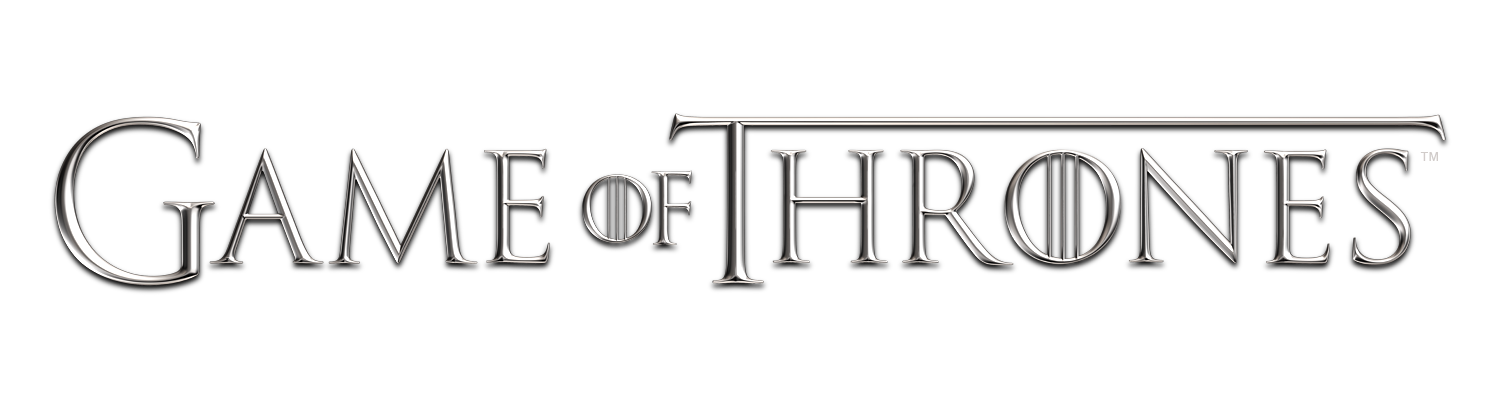

In [1]:
from IPython.display import Image
Image("Logo_Game_of_Thrones.png")

In [17]:
import numpy as np
import pandas as ps
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA

In [18]:
# read CSV and display the first 5 rows
df = ps.read_csv('character-deaths.csv')
df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [19]:
#cleaning the dataset
df["Death Year"].fillna(0,inplace=True)
df["Is Alive?"]=Series([0 if i==0 else 1 for i in df["Death Year"]])
df=df.drop(['Book of Death','Death Chapter','Death Year'],axis=1)
df["Allegiances"]=Series(["Night's Watch" if i=="Night's Watch" else i.split()[-1] for i in df["Allegiances"]])
df=df.dropna()

df.head()

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Is Alive?
0,Addam Marbrand,Lannister,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),None,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,Targaryen,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,Greyjoy,20.0,1,1,0,0,0,0,1,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,21.0,1,1,1,0,1,1,0,1


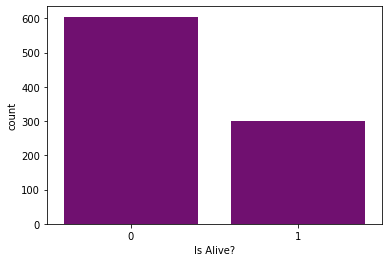

In [20]:
sum = sns.countplot(x="Is Alive?", data=df, color="purple")
# 1 = dead 
# 0 = alive


In [21]:
#df[df["Allegiances"]=="None"][df["Is Alive?"]==0]

#df[df["Allegiances"]=="None"][["Is Alive?"]]
df["GoT"]

0      1
1      0
2      0
3      0
6      1
7      1
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     1
24     1
25     0
27     0
28     0
29     0
30     0
31     0
32     0
      ..
887    0
888    0
889    1
890    0
891    0
892    0
893    1
894    0
895    1
896    0
897    0
898    0
899    0
900    0
901    0
902    0
903    0
904    0
905    0
906    0
907    1
908    1
909    0
910    0
911    0
912    0
913    0
914    0
915    0
916    0
Name: GoT, Length: 905, dtype: int64

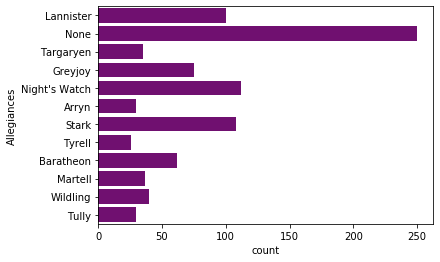

In [22]:
sum = sns.countplot(y="Allegiances", data=df, color="purple")

In [23]:
#group by to focus on the Allegiances
gb=df.groupby("Allegiances")
gb.mean()

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Is Alive?
Allegiances,,,,,,,,,
Arryn,33.766667,0.800000,0.666667,0.600000,0.000000,0.233333,0.666667,0.000000,0.166667
Baratheon,19.580645,0.903226,0.725806,0.145161,0.774194,0.354839,0.064516,0.274194,0.387097
Greyjoy,24.000000,0.933333,0.493333,0.013333,0.373333,0.000000,0.613333,0.186667,0.293333
Lannister,30.590000,0.860000,0.650000,0.390000,0.620000,0.430000,0.490000,0.140000,0.300000
Martell,23.891892,0.621622,0.675676,0.000000,0.000000,0.405405,0.459459,0.567568,0.081081
Night's Watch,30.589286,1.000000,0.098214,0.321429,0.312500,0.687500,0.107143,0.366071,0.482143
None,30.764000,0.796000,0.360000,0.188000,0.232000,0.456000,0.228000,0.264000,0.296000
Stark,28.500000,0.750000,0.638889,0.574074,0.462963,0.287037,0.092593,0.277778,0.425926
Targaryen,28.228571,0.828571,0.285714,0.457143,0.314286,0.400000,0.000000,0.828571,0.228571


In [24]:
gbm=gb.mean()
print("**percent to live**")
print(100-gbm["Is Alive?"]*100)

**percent to live**
Allegiances
Arryn            83.333333
Baratheon        61.290323
Greyjoy          70.666667
Lannister        70.000000
Martell          91.891892
Night's Watch    51.785714
None             70.400000
Stark            57.407407
Targaryen        77.142857
Tully            70.000000
Tyrell           92.307692
Wildling         42.500000
Name: Is Alive?, dtype: float64


In [25]:
# as you can see, the highst chance to live is to be allegiance to Tyrell

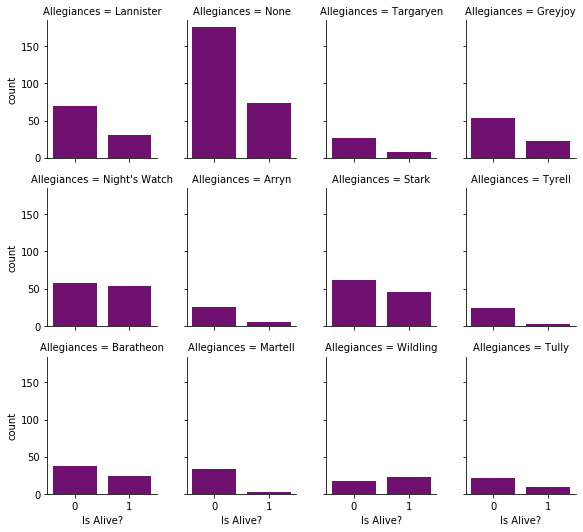

In [26]:
g = sns.catplot("Is Alive?", col_wrap=4,col="Allegiances",
               data=df, kind="count", height=2.5, aspect=.8,color="purple")

In [27]:
#turns the text of the "Allegiances" into numbers so i can put it in the model
lb = LabelEncoder()
df["Allegiances"] = lb.fit_transform(df["Allegiances"])
df.head()

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Is Alive?
0,Addam Marbrand,3,56.0,1,1,1,1,1,1,0,0
1,Aegon Frey (Jinglebell),6,49.0,1,1,0,0,1,0,0,1
2,Aegon Targaryen,8,5.0,1,1,0,0,0,0,1,0
3,Adrack Humble,2,20.0,1,1,0,0,0,0,1,1
6,Aemon Targaryen (son of Maekar I),5,21.0,1,1,1,0,1,1,0,1


In [28]:
#split the data to test and train
X=df[["Allegiances","Book Intro Chapter","Gender","Nobility","GoT","CoK","SoS","FfC","DwD"]]
y=df["Is Alive?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (633, 9)
Training Labels: (633,)
Testing FeatureSet: (272, 9)
Testing Labels: (272,)


# Logistic regression

In [29]:
#instantiate, fit the model to the training data, and print the score
logreg = LogisticRegression(solver="lbfgs",max_iter=1000) 
logreg.fit(X_train, y_train)
print("test score:",logreg.score(X_test,y_test))
print("train score:",logreg.score(X_train,y_train))

test score: 0.7022058823529411
train score: 0.7156398104265402


In [30]:
LogisticRegression(solver="lbfgs",max_iter=1000,multi_class="multinomial",warm_start=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [31]:
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[156  35]
 [ 46  35]]


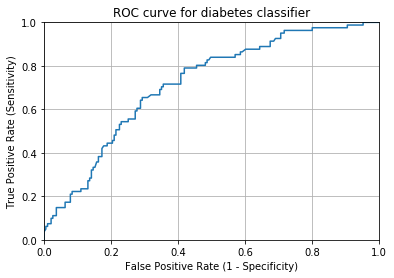

In [32]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [33]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7168896645336436


In [34]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the PCA
test score: 0.5808823529411765
train score: 0.5924170616113744


# SVC

In [35]:
#instantiate, fit the model to the training data, and print the score
svc=SVC(gamma='auto',probability=True).fit(X_train,y_train)
print("test score:",svc.score(X_test,y_test))
print("train score:",svc.score(X_train,y_train))

test score: 0.7610294117647058
train score: 0.7709320695102686


In [36]:
SVC(probability=True)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred_class = svc.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[181  10]
 [ 55  26]]


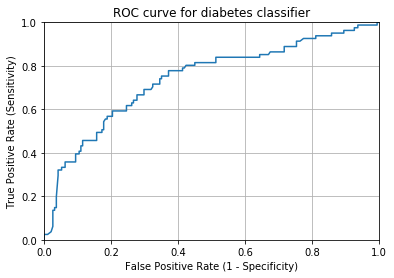

In [38]:
y_pred_prob = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7390601771055523


In [40]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",svc.score(X_t_test,y_test))
print("train score:",svc.score(X_t_train,y_train))

Score from the PCA
test score: 0.6985294117647058
train score: 0.6445497630331753


# KNN

Text(0, 0.5, 'Cross-Validated Accuracy')

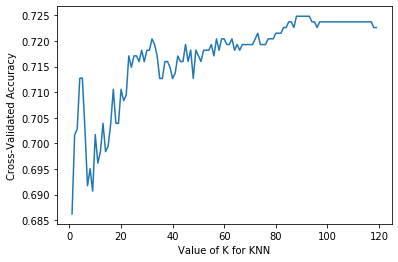

In [41]:
# search for an optimal value of K for KNN
k_range = list(range(1, 120))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights="distance")
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=95,weights="distance")
print("cross validation score:",cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

knn.fit(X_train,y_train)
print("test score:",knn.score(X_test,y_test))
print("train score:",knn.score(X_train,y_train))

cross validation score: 0.7237240537240538
test score: 0.7352941176470589
train score: 0.9494470774091627


In [43]:
KNeighborsClassifier(n_neighbors=95,weights="distance")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=95, p=2,
                     weights='distance')

In [44]:
y_pred_class = knn.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[180  11]
 [ 61  20]]


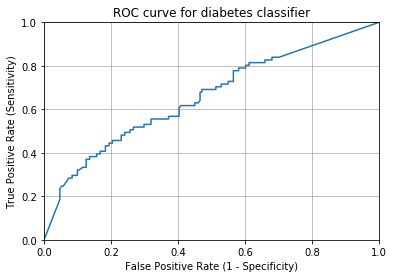

In [45]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [46]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6572296554844548


In [47]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",knn.score(X_t_test,y_test))
print("train score:",knn.score(X_t_train,y_train))

Score from the PCA
test score: 0.7022058823529411
train score: 0.6540284360189573


# naive_bayes

In [48]:
clf = GaussianNB(var_smoothing=1)
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))


test score: 0.7022058823529411
train score: 0.6540284360189573


In [49]:
GaussianNB(var_smoothing=1)

GaussianNB(priors=None, var_smoothing=1)

In [50]:
y_pred_class = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[191   0]
 [ 81   0]]


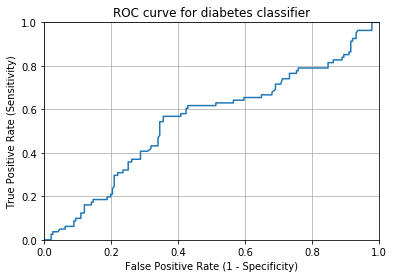

In [51]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [52]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.547346648568289


In [53]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.7022058823529411
train score: 0.6540284360189573


# ADABOOST

In [54]:
clf = GaussianNB(var_smoothing=1)
clf = AdaBoostClassifier(n_estimators=70)
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.7352941176470589
train score: 0.7251184834123223


In [55]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

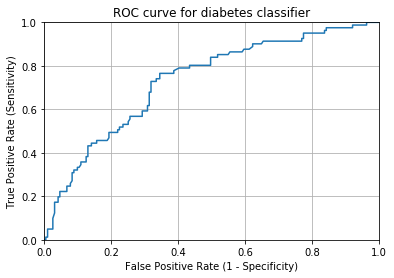

In [56]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [57]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7311098183698534


In [58]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.6102941176470589
train score: 0.6050552922590837
